In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [2]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [3]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

<AxesSubplot:>

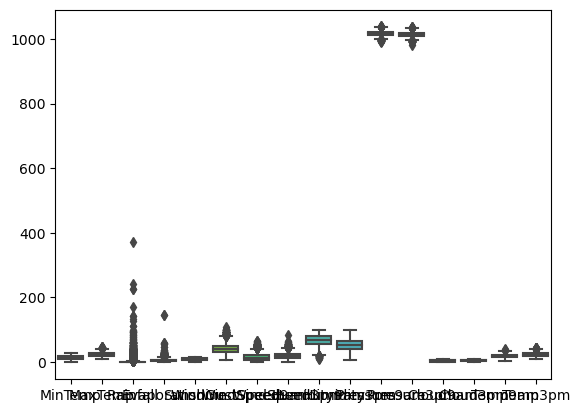

In [4]:
import seaborn as sns 
sns.boxplot(data=df)

In [5]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [7]:
def randomsampleimputation(df,variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [8]:
randomsampleimputation(df,'Cloud9am')
randomsampleimputation(df,'Cloud3pm')
randomsampleimputation(df,'Evaporation')
randomsampleimputation(df,'Sunshine')


In [9]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation         0
Sunshine            0
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am            0
Cloud3pm            0
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,8425.000000,8425.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,8425.000000,8425.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.395039,7.628368,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.581009,4.497329,17.762015,22.442934
std,5.403596,6.136408,10.459379,4.975088,3.899493,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877215,2.728847,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.700000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.600000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,6.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [11]:
num_fet=[feature for feature in df.columns if df[feature].dtypes!='O']
discrete_fet=[feature for feature in num_fet if len(df[feature].unique())<25]
cont_fet=[feature for feature in num_fet if feature not in discrete_fet]
cat_fet=[feature for feature in df.columns if feature not in num_fet]

In [12]:
print('Numerical features {}'.format(len(num_fet)))
print('Discrete features {}'.format(len(discrete_fet)))
print('Continous values{}'. format(len(cont_fet)))
print('Categorical features {}'.format(len(cat_fet)))

Numerical features 16
Discrete features 2
Continous values14
Categorical features 7


In [13]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [14]:
df['Location'].dtypes

dtype('O')

In [15]:
cont_fet

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [16]:
num_fet

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [17]:
cat_fet

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [18]:
discrete_fet

['Cloud9am', 'Cloud3pm']

In [19]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [20]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [21]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation         0
Sunshine            0
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am            0
Cloud3pm            0
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

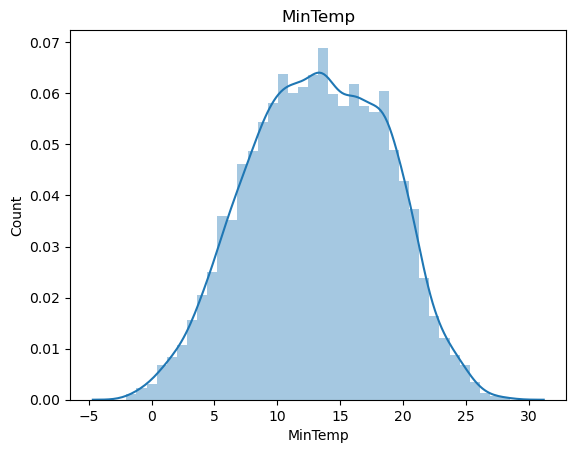

<Figure size 1200x700 with 0 Axes>

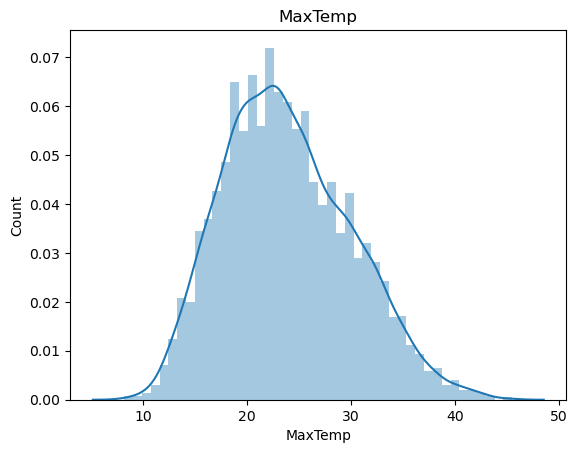

<Figure size 1200x700 with 0 Axes>

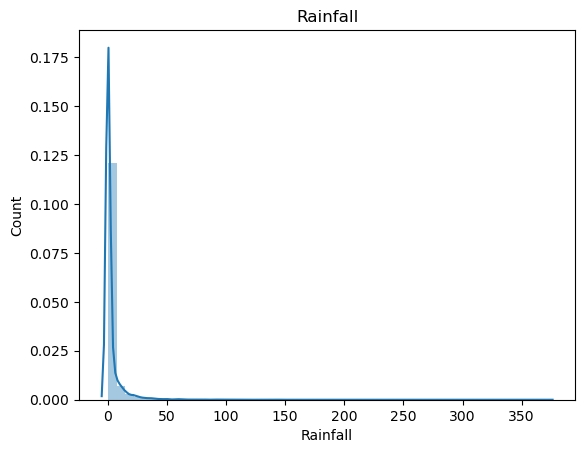

<Figure size 1200x700 with 0 Axes>

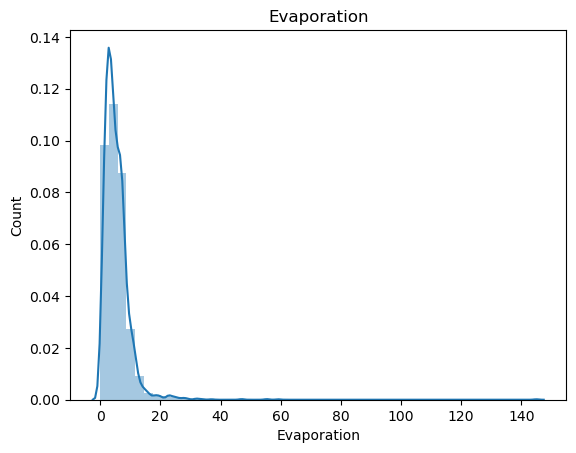

<Figure size 1200x700 with 0 Axes>

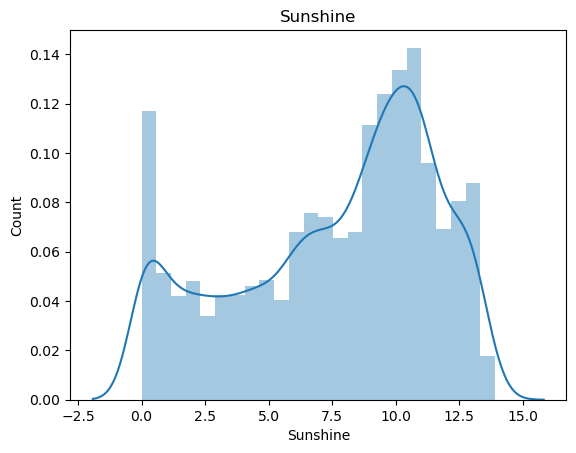

<Figure size 1200x700 with 0 Axes>

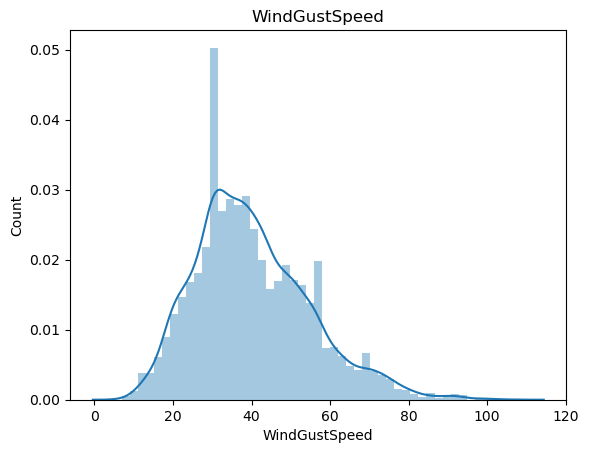

<Figure size 1200x700 with 0 Axes>

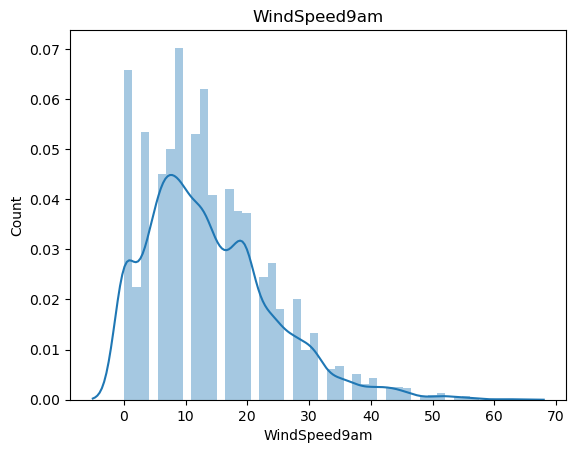

<Figure size 1200x700 with 0 Axes>

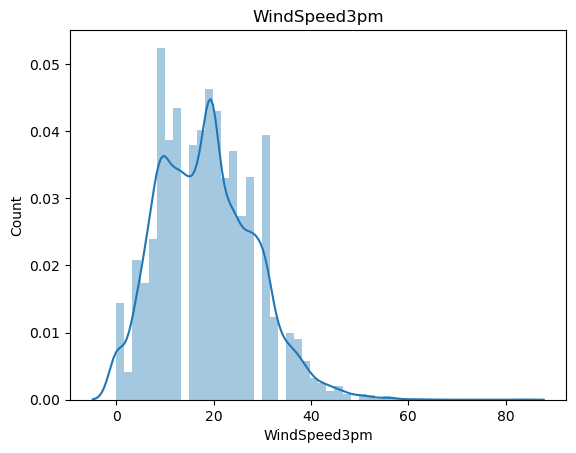

<Figure size 1200x700 with 0 Axes>

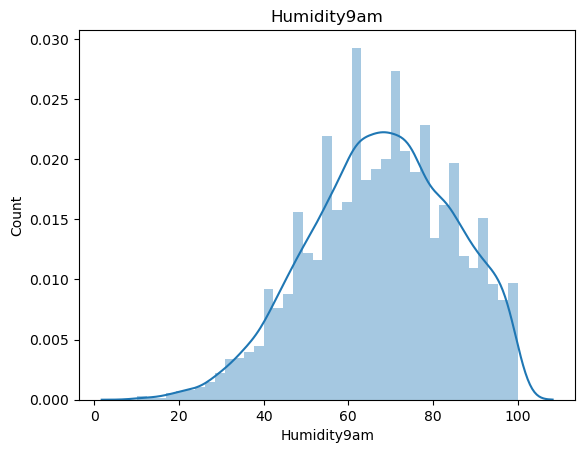

<Figure size 1200x700 with 0 Axes>

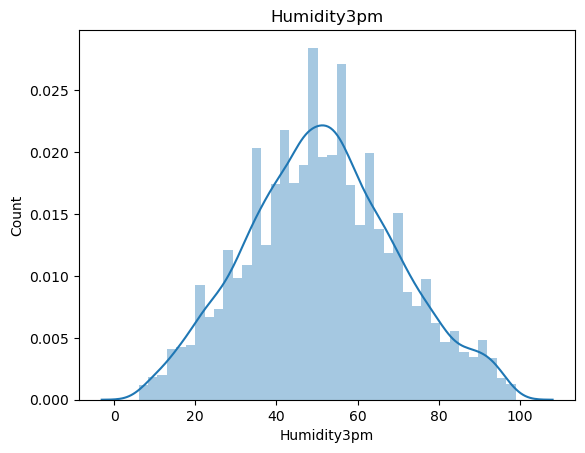

<Figure size 1200x700 with 0 Axes>

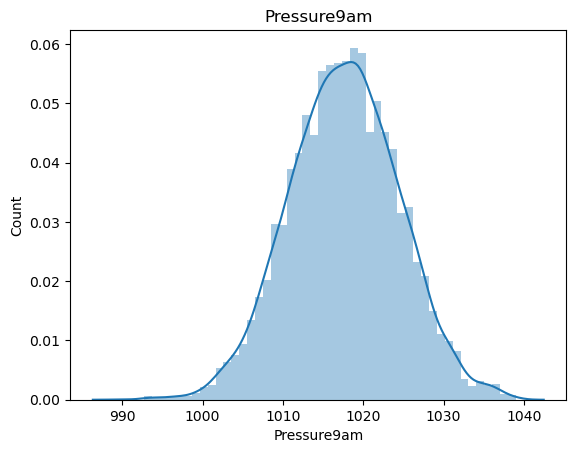

<Figure size 1200x700 with 0 Axes>

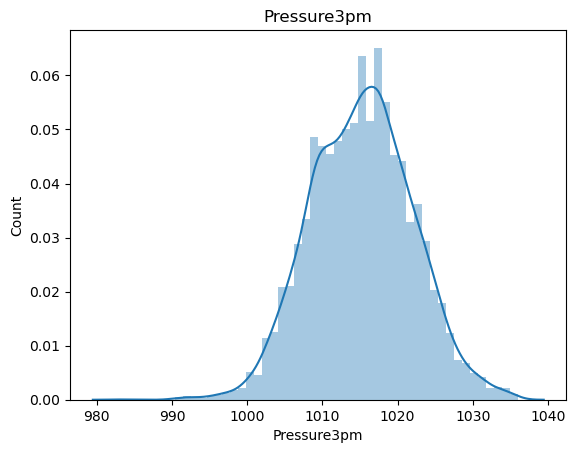

<Figure size 1200x700 with 0 Axes>

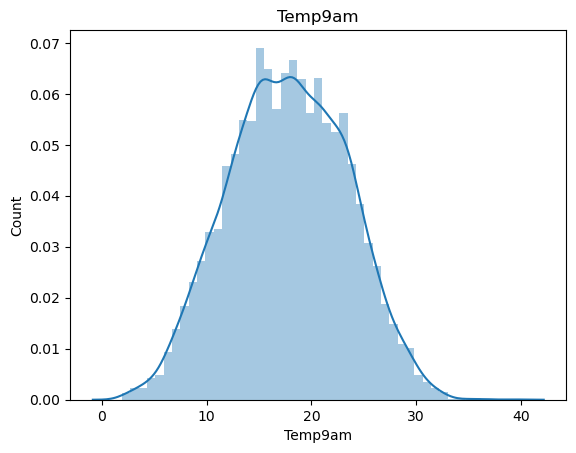

<Figure size 1200x700 with 0 Axes>

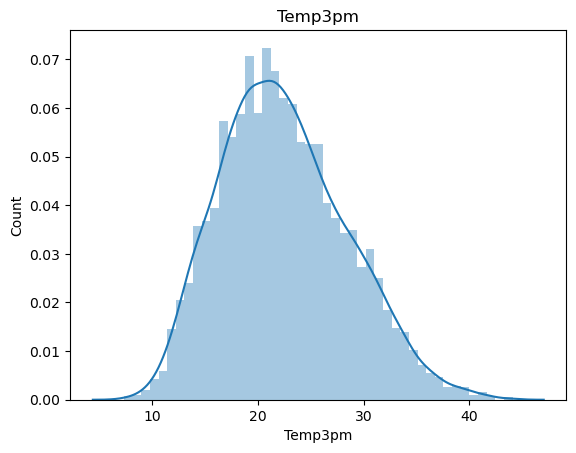

<Figure size 1200x700 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
for feature in cont_fet:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.figure(figsize=(12,7))
    plt.show()

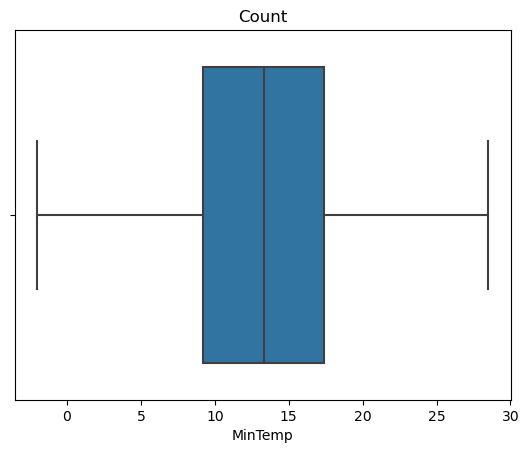

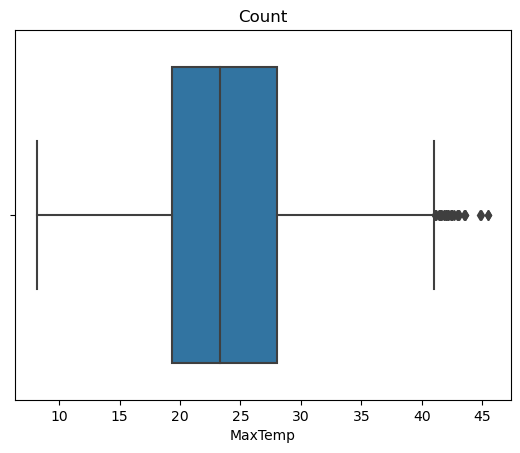

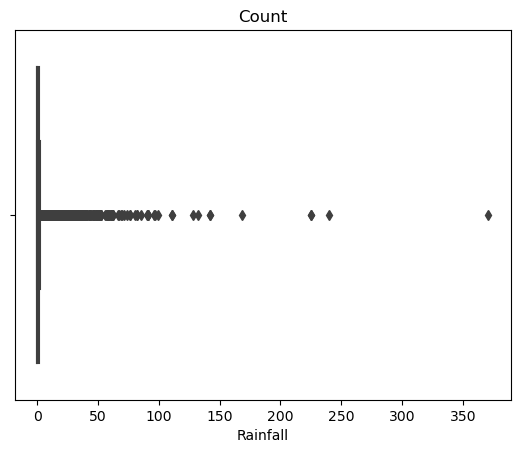

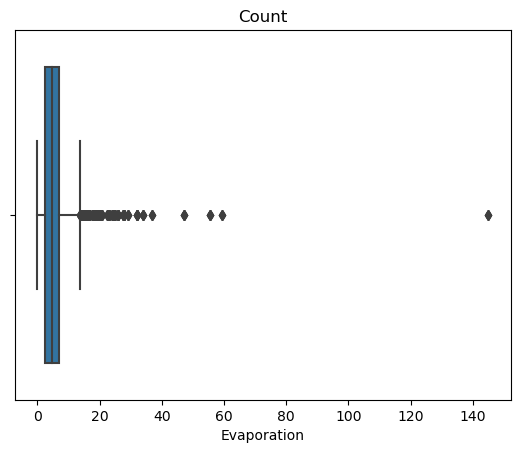

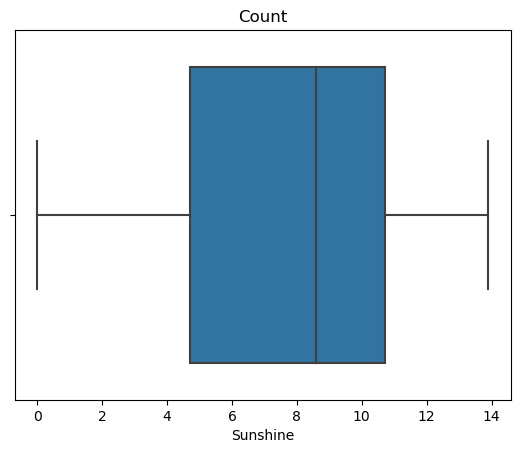

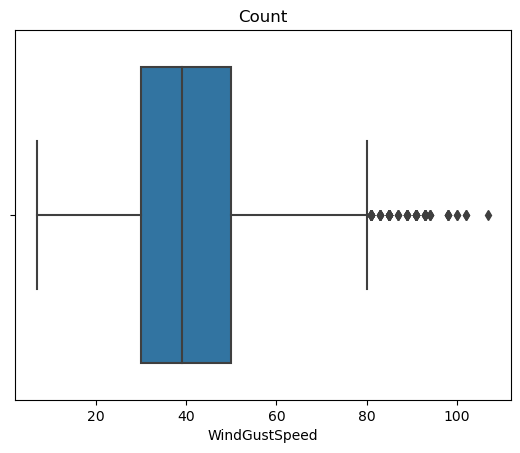

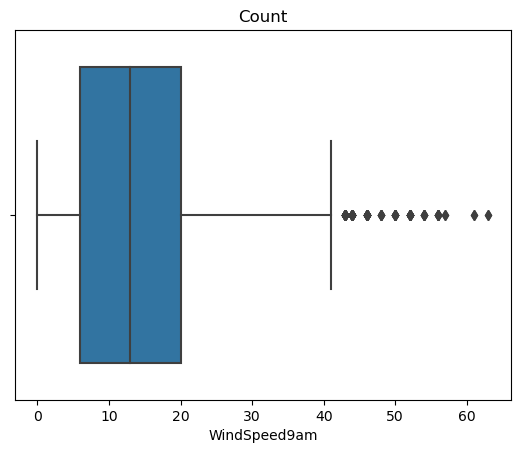

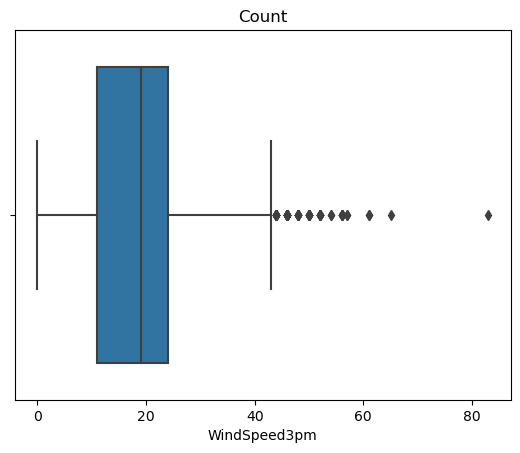

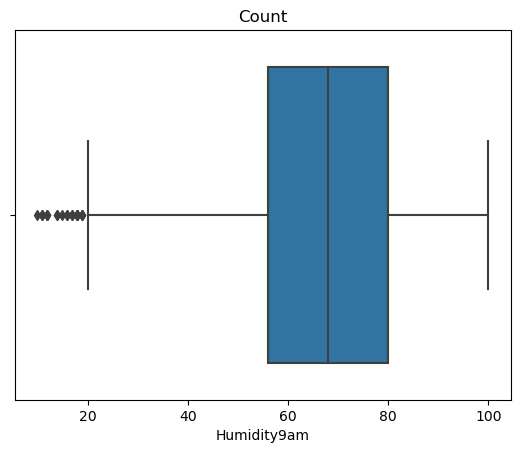

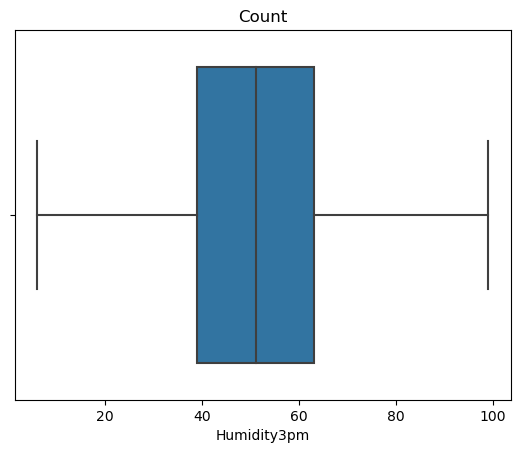

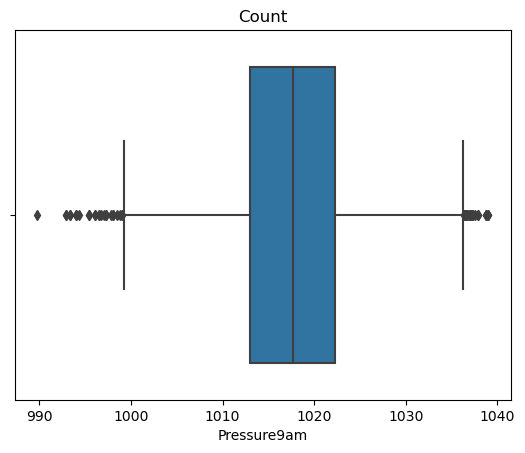

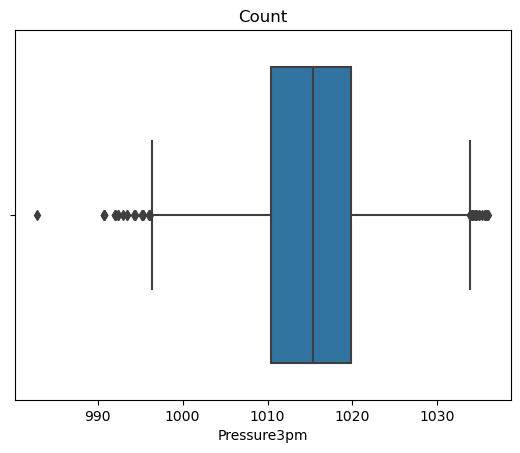

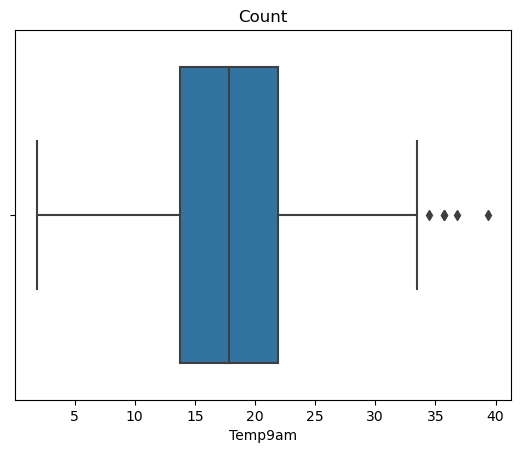

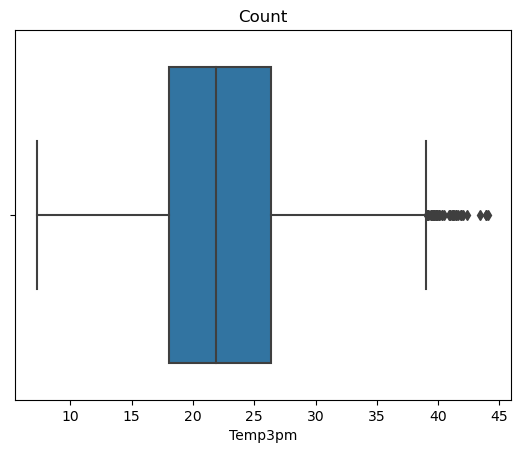

In [23]:
for feature in cont_fet:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title('Count')
    plt.show()

In [24]:
for features in cont_fet:
    if(df[features].isnull().sum() >0):
        df[features]=df[features].fillna(df[features].median())

In [25]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In [26]:
cat_fet

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [27]:
    df[['Date',
     'Location',
     'WindGustDir',
     'WindDir9am',
     'WindDir3pm',
     'RainToday',
     'RainTomorrow']]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,E,SE,ENE,No,No
8421,2017-06-22,Uluru,NNW,SE,N,No,No
8422,2017-06-23,Uluru,N,SE,WNW,No,No
8423,2017-06-24,Uluru,SE,SSE,N,No,No


In [28]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [29]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [30]:
df['RainTomorrow']=pd.get_dummies(df['RainTomorrow'],drop_first=True)
df['RainToday']=pd.get_dummies(df['RainToday'],drop_first=True)

In [31]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [32]:
df['RainTomorrow'].value_counts()

0    6434
1    1991
Name: RainTomorrow, dtype: int64

In [33]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [34]:
df[['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,0,0
1,2008-12-02,Albury,WNW,NNW,WSW,0,0
2,2008-12-03,Albury,WSW,W,WSW,0,0
3,2008-12-04,Albury,NE,SE,E,0,0
4,2008-12-05,Albury,W,ENE,NW,0,0
...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,E,SE,ENE,0,0
8421,2017-06-22,Uluru,NNW,SE,N,0,0
8422,2017-06-23,Uluru,N,SE,WNW,0,0
8423,2017-06-24,Uluru,SE,SSE,N,0,0


In [35]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()

In [36]:
df['Location']=labelencoder.fit_transform(df['Location'])
df['WindGustDir']=labelencoder.fit_transform(df['WindGustDir'])
df['WindDir9am']=labelencoder.fit_transform(df['WindDir9am'])
df['WindDir3pm']=labelencoder.fit_transform(df['WindDir3pm'])

In [37]:
df[['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,1,13,13,14,0,0
1,2008-12-02,1,14,6,15,0,0
2,2008-12-03,1,15,13,15,0,0
3,2008-12-04,1,4,9,0,0,0
4,2008-12-05,1,13,1,7,0,0
...,...,...,...,...,...,...,...
8420,2017-06-21,9,0,9,1,0,0
8421,2017-06-22,9,6,9,3,0,0
8422,2017-06-23,9,3,9,14,0,0
8423,2017-06-24,9,9,10,3,0,0


In [38]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%dT',errors='coerce')

In [39]:
df[['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,1,13,13,14,0,0
1,2008-12-02,1,14,6,15,0,0
2,2008-12-03,1,15,13,15,0,0
3,2008-12-04,1,4,9,0,0,0
4,2008-12-05,1,13,1,7,0,0
...,...,...,...,...,...,...,...
8420,2017-06-21,9,0,9,1,0,0
8421,2017-06-22,9,6,9,3,0,0
8422,2017-06-23,9,3,9,14,0,0
8423,2017-06-24,9,9,10,3,0,0


In [40]:
df['Date_Month']=df['Date'].dt.month

In [41]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_Month
0,2008-12-01,1,13.4,22.9,0.6,3.0,13.8,13,44.0,13,...,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0,12
1,2008-12-02,1,7.4,25.1,0.0,2.2,7.6,14,44.0,6,...,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0,12
2,2008-12-03,1,12.9,25.7,0.0,4.6,7.7,15,46.0,13,...,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0,12
3,2008-12-04,1,9.2,28.0,0.0,1.8,8.0,4,24.0,9,...,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0,12
4,2008-12-05,1,17.5,32.3,1.0,3.8,11.9,13,41.0,1,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,9,2.8,23.4,0.0,6.4,1.2,0,31.0,9,...,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0,6
8421,2017-06-22,9,3.6,25.3,0.0,12.6,7.1,6,22.0,9,...,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0,6
8422,2017-06-23,9,5.4,26.9,0.0,4.2,13.0,3,37.0,9,...,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0,6
8423,2017-06-24,9,7.8,27.0,0.0,4.0,13.1,9,28.0,10,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6


In [42]:
df['Date_Day']=df['Date'].dt.day
df['Date_year']=df['Date'].dt.year

In [43]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_Month,Date_Day,Date_year
0,2008-12-01,1,13.4,22.9,0.6,3.0,13.8,13,44.0,13,...,1007.1,8.0,8.0,16.9,21.8,0,0,12,1,2008
1,2008-12-02,1,7.4,25.1,0.0,2.2,7.6,14,44.0,6,...,1007.8,1.0,4.0,17.2,24.3,0,0,12,2,2008
2,2008-12-03,1,12.9,25.7,0.0,4.6,7.7,15,46.0,13,...,1008.7,2.0,2.0,21.0,23.2,0,0,12,3,2008
3,2008-12-04,1,9.2,28.0,0.0,1.8,8.0,4,24.0,9,...,1012.8,8.0,7.0,18.1,26.5,0,0,12,4,2008
4,2008-12-05,1,17.5,32.3,1.0,3.8,11.9,13,41.0,1,...,1006.0,7.0,8.0,17.8,29.7,0,0,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,9,2.8,23.4,0.0,6.4,1.2,0,31.0,9,...,1020.3,8.0,4.0,10.1,22.4,0,0,6,21,2017
8421,2017-06-22,9,3.6,25.3,0.0,12.6,7.1,6,22.0,9,...,1019.1,1.0,1.0,10.9,24.5,0,0,6,22,2017
8422,2017-06-23,9,5.4,26.9,0.0,4.2,13.0,3,37.0,9,...,1016.8,6.0,5.0,12.5,26.1,0,0,6,23,2017
8423,2017-06-24,9,7.8,27.0,0.0,4.0,13.1,9,28.0,10,...,1016.5,3.0,2.0,15.1,26.0,0,0,6,24,2017


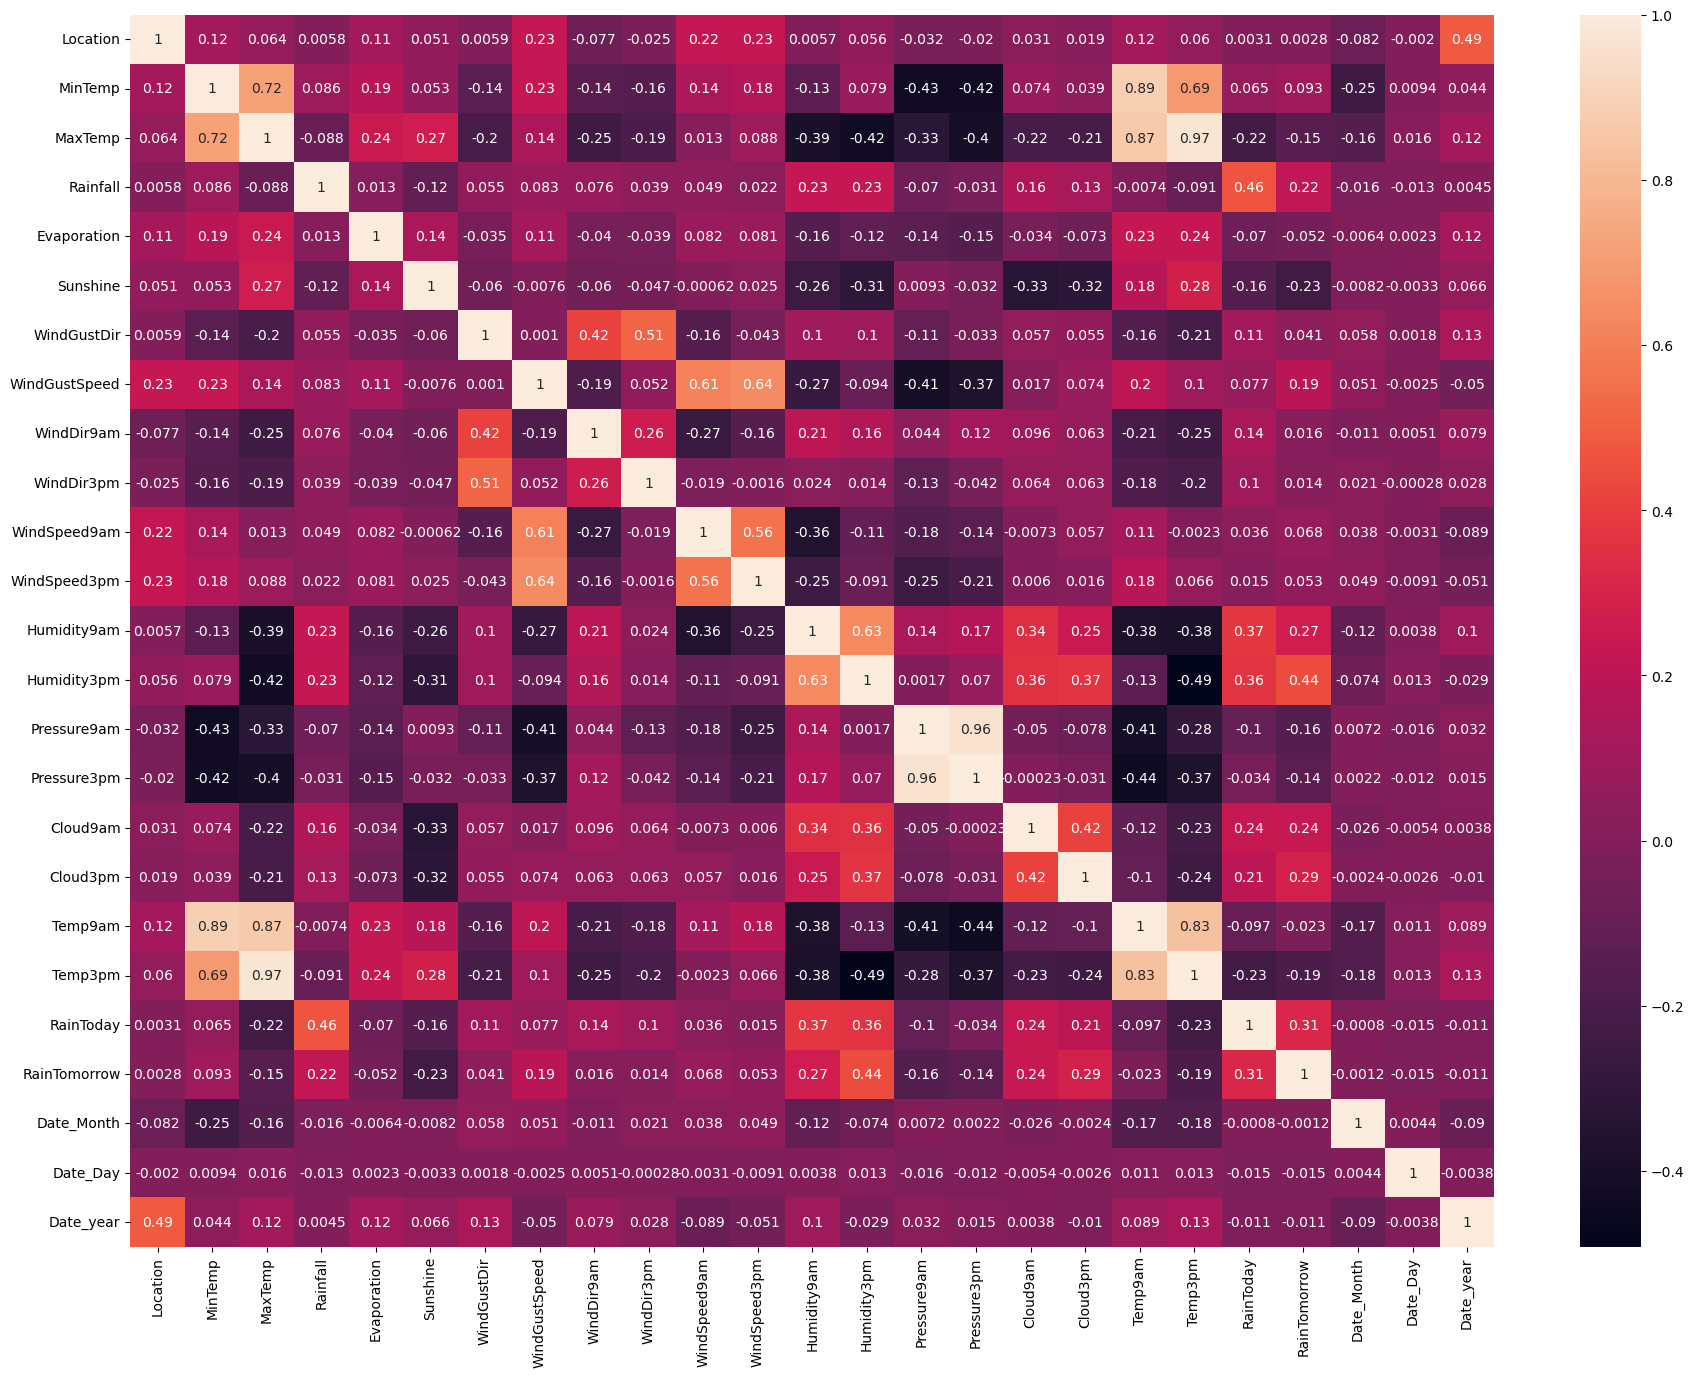

In [44]:
cormat=df.corr()
plt.figure(figsize=(22,16))
g=sns.heatmap(cormat,annot=True)

In [45]:
cont_fet

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

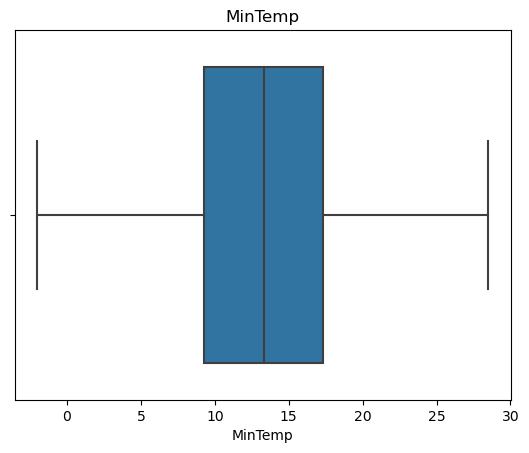

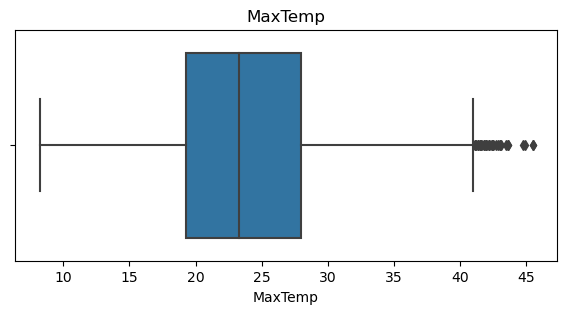

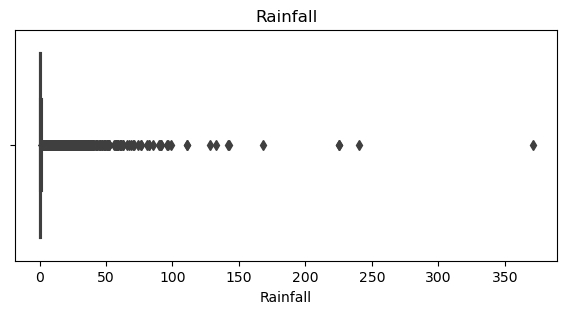

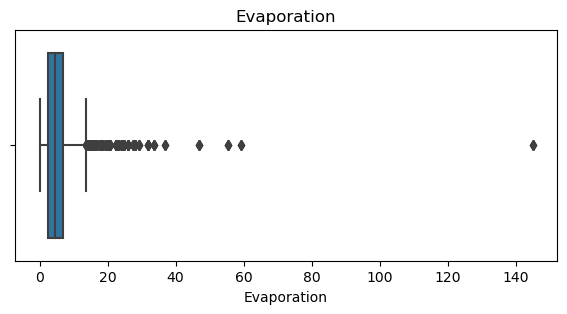

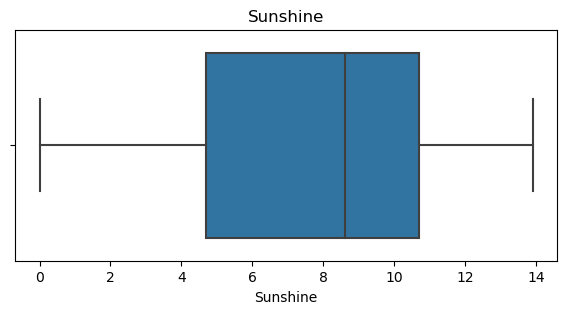

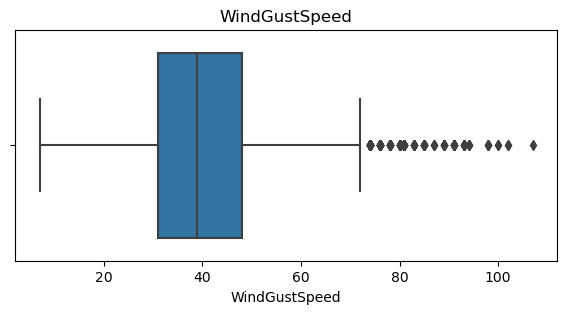

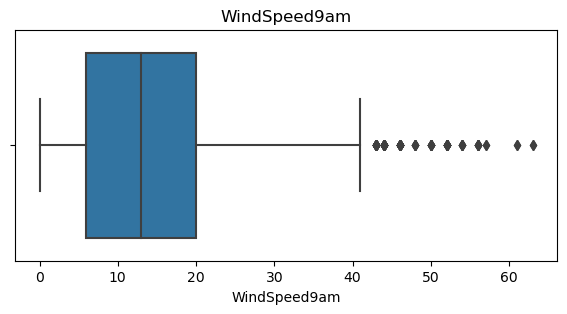

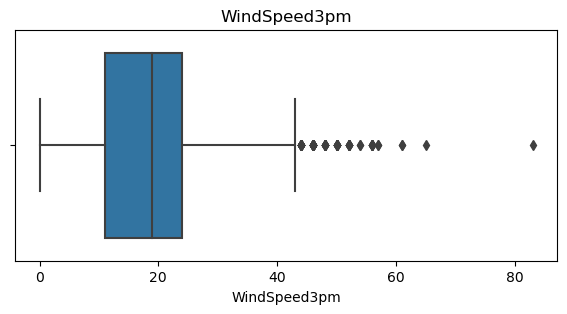

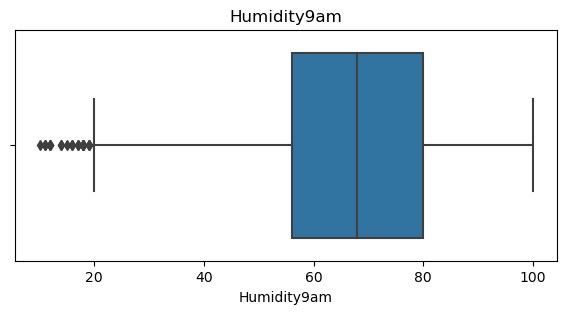

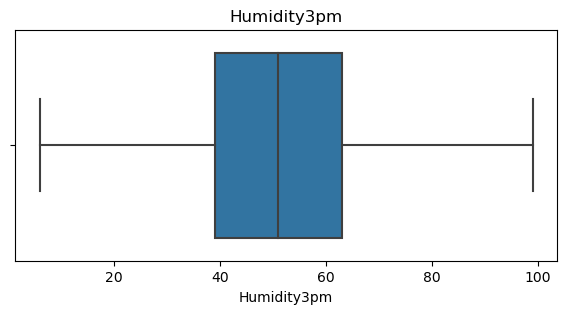

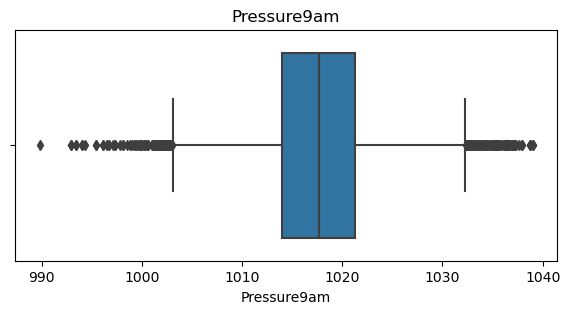

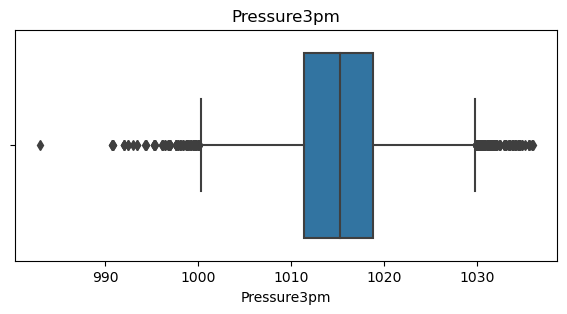

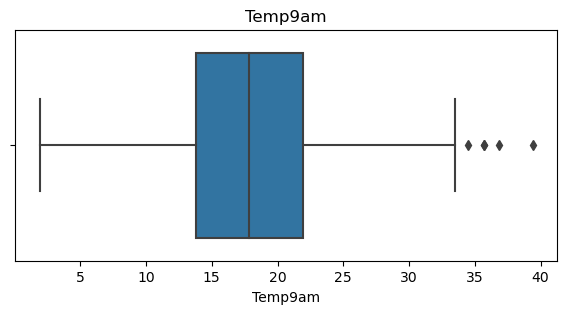

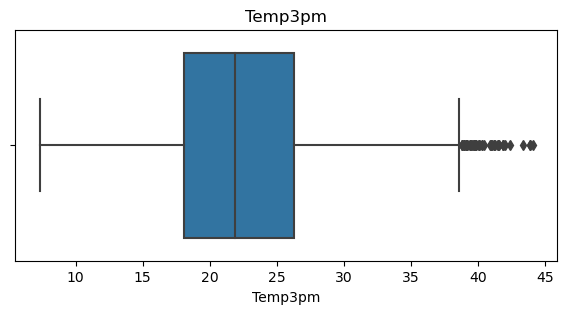

<Figure size 700x300 with 0 Axes>

In [46]:
for feature in cont_fet:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(7,3))

In [47]:
def outliers(df,variable):
    iqr=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_bridge=df[variable].quantile(0.25)-(iqr*1.5)
    upper_bridge=df[variable].quantile(0.75)+(iqr*1.5)
    df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
    df.loc[df[variable]<=lower_bridge,variable]=lower_bridge
    

In [48]:
for feature in cont_fet:
    outliers(df,str(feature))


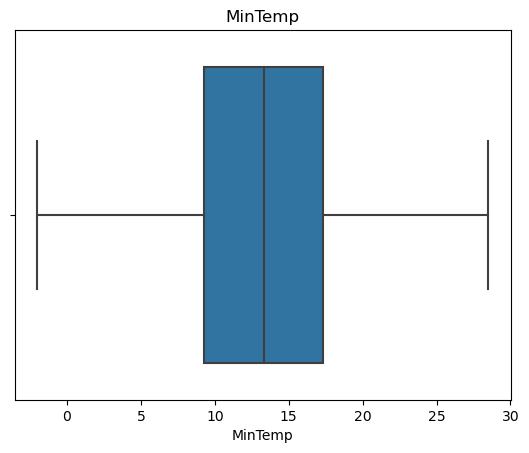

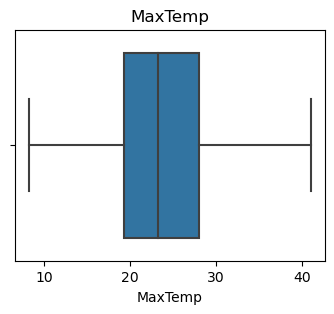

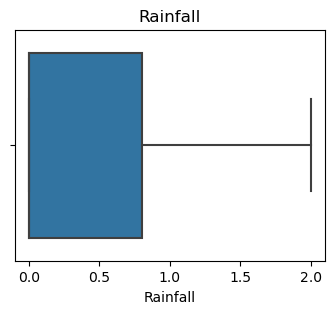

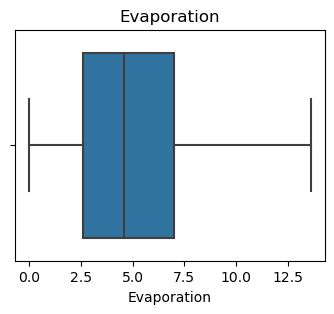

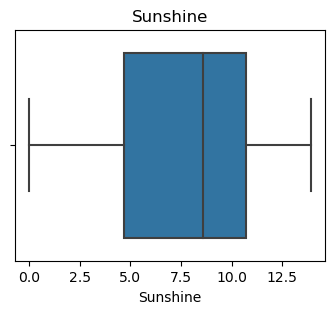

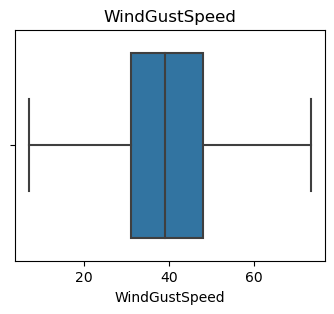

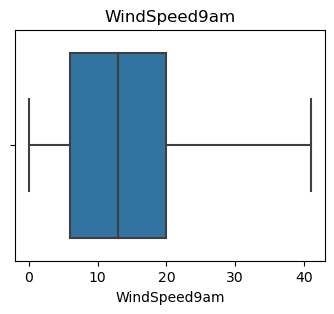

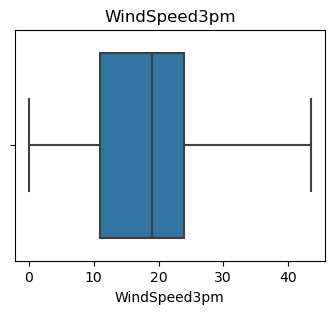

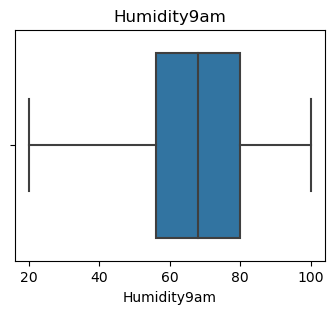

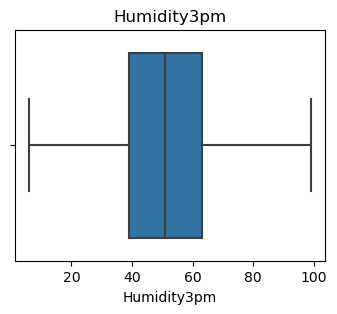

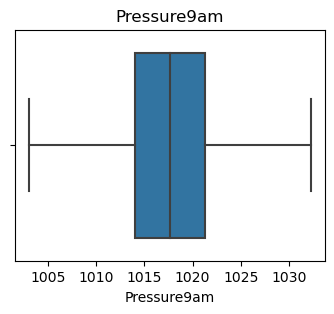

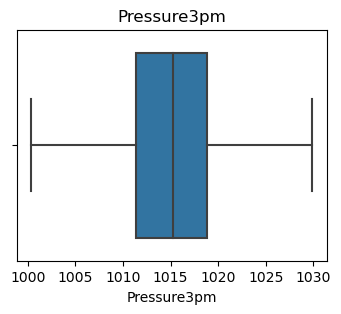

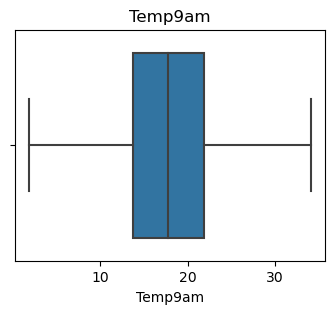

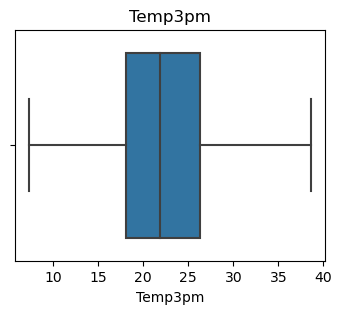

<Figure size 400x300 with 0 Axes>

In [49]:
for feature in cont_fet:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(4,3))

# Data Analysis

In [50]:
import scipy.stats as stats
def qq_plots(df,variable):
    plt.figure(figsize=(9,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=plt)
    plt.show()

MinTemp


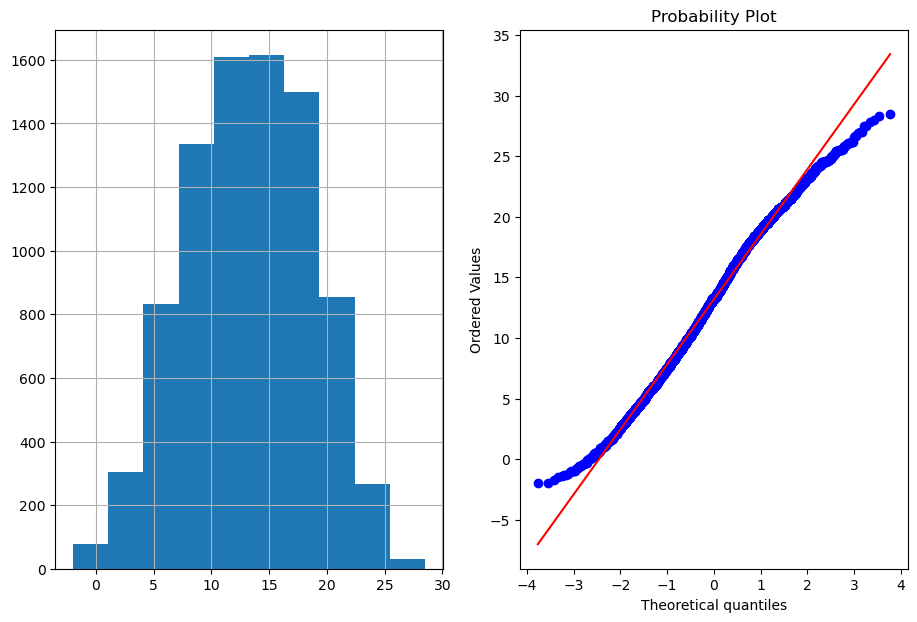

MaxTemp


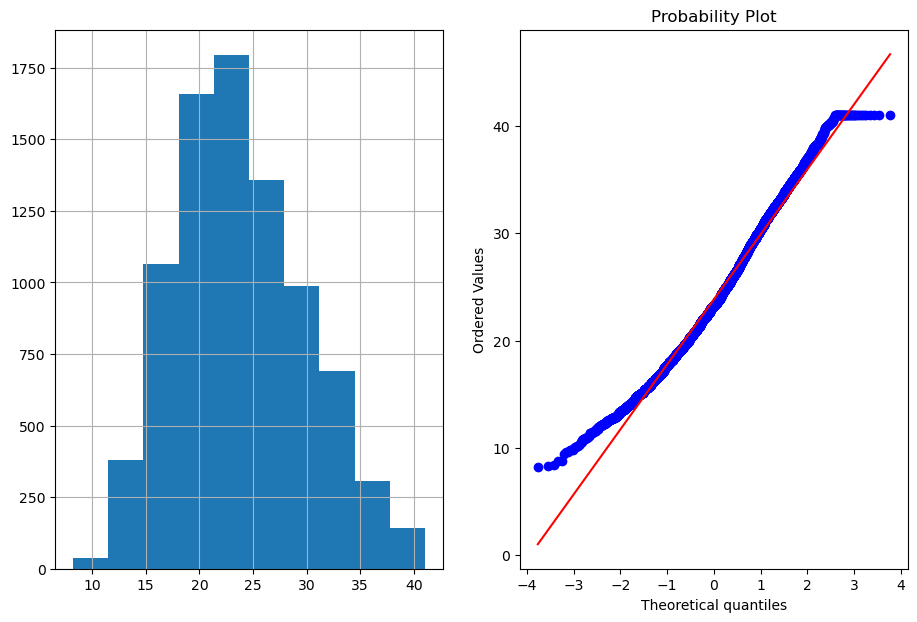

Rainfall


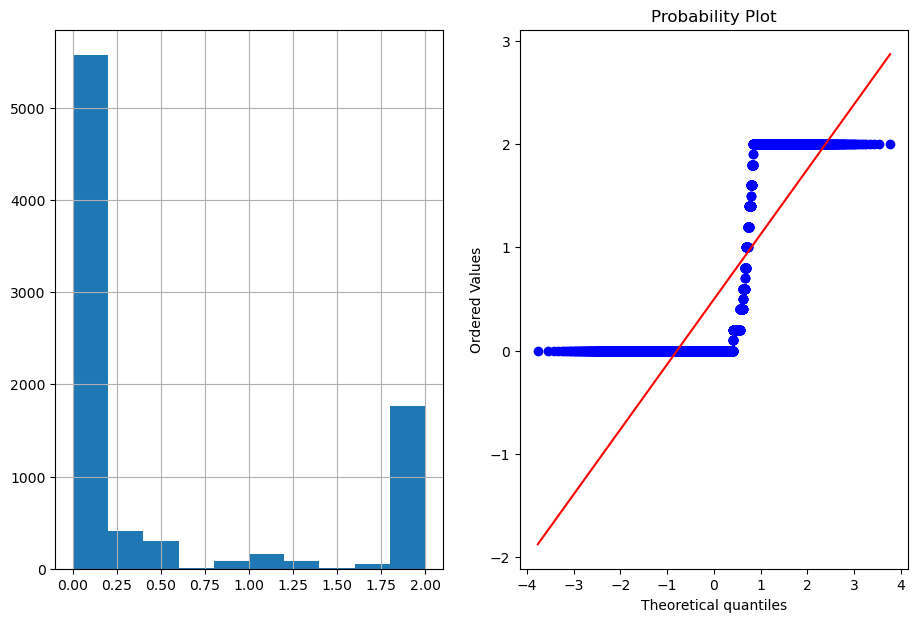

Evaporation


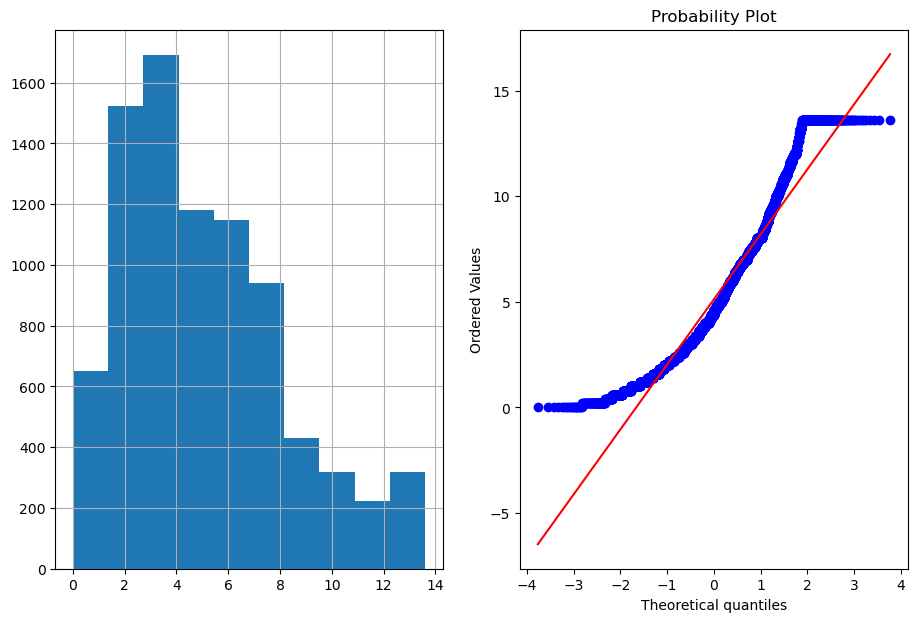

Sunshine


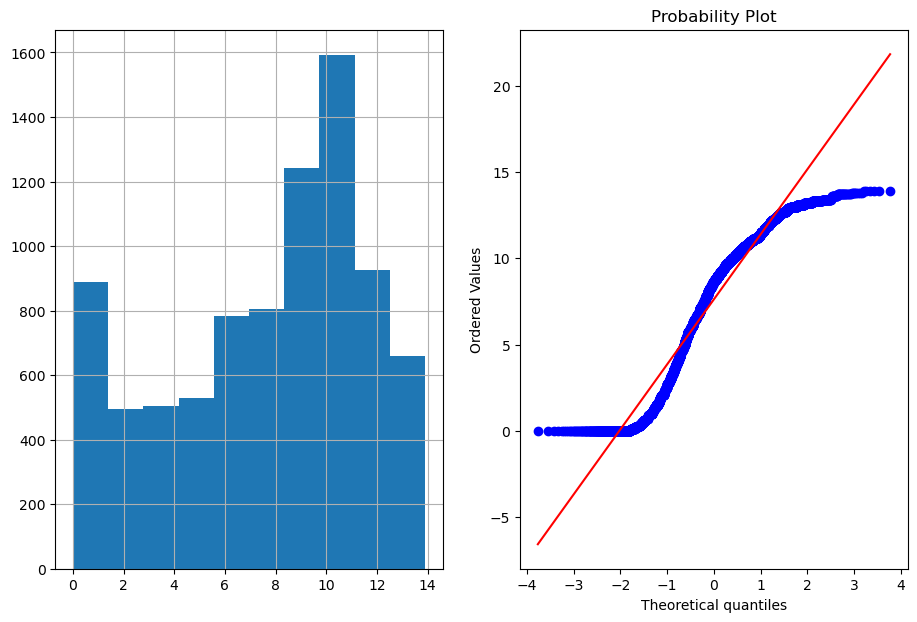

WindGustSpeed


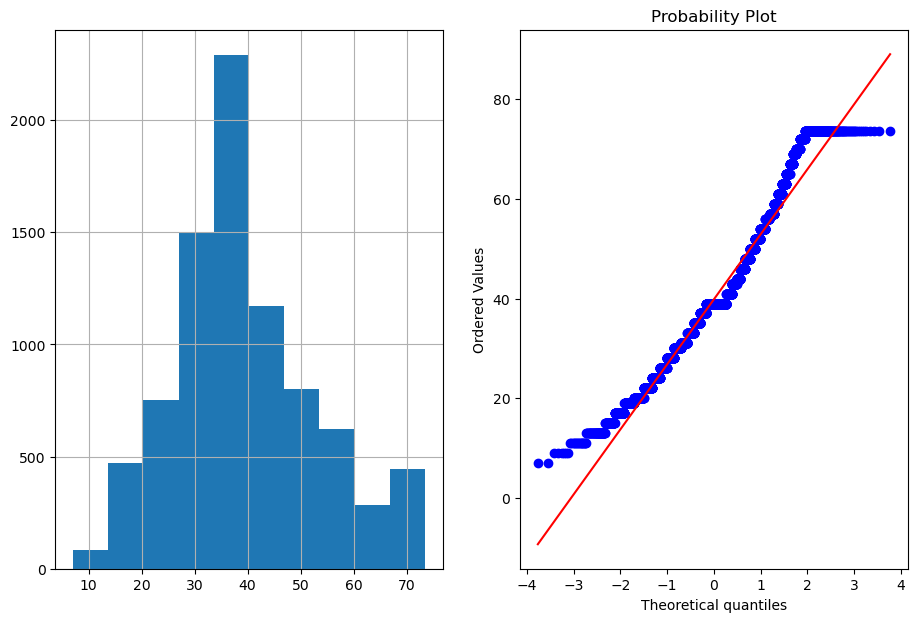

WindSpeed9am


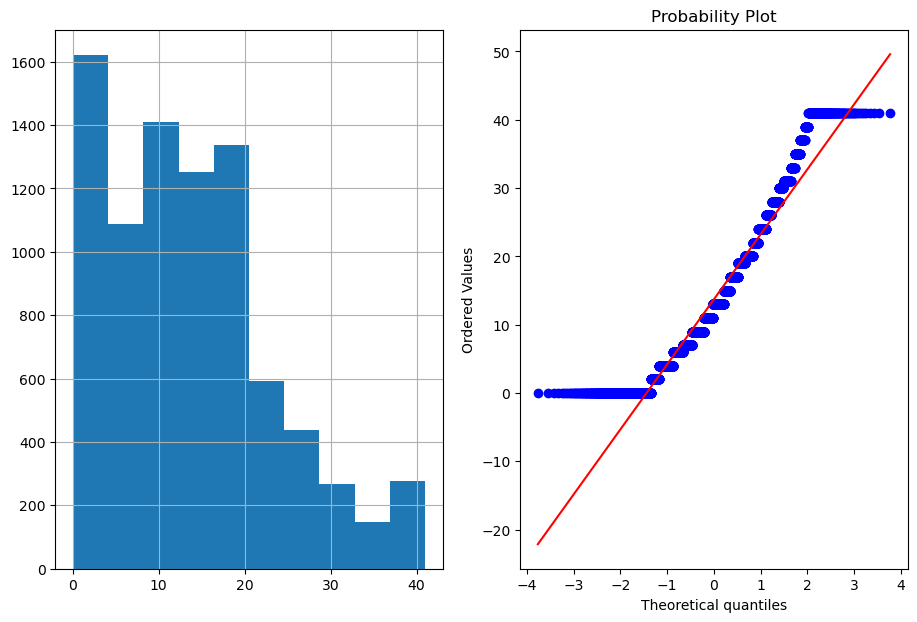

WindSpeed3pm


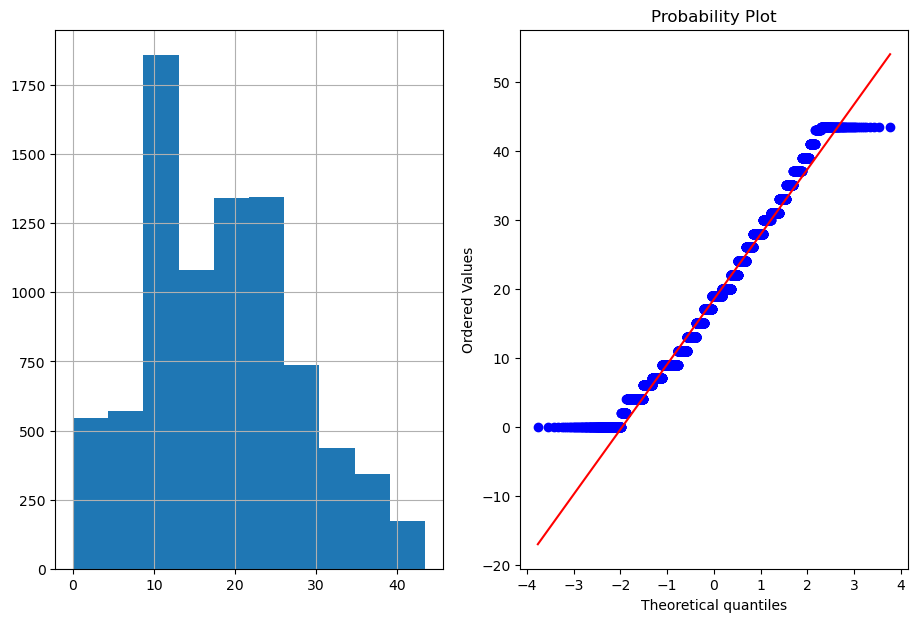

Humidity9am


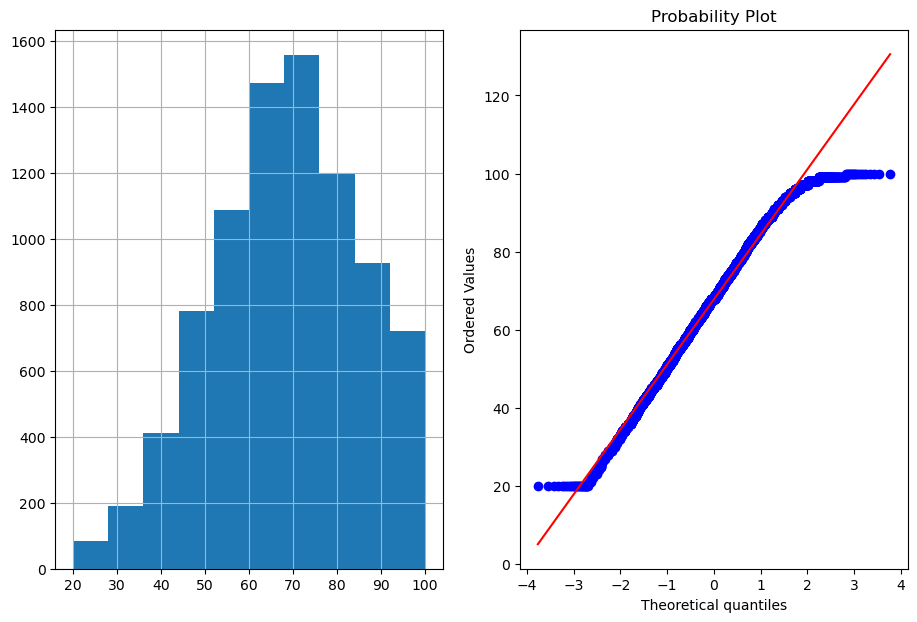

Humidity3pm


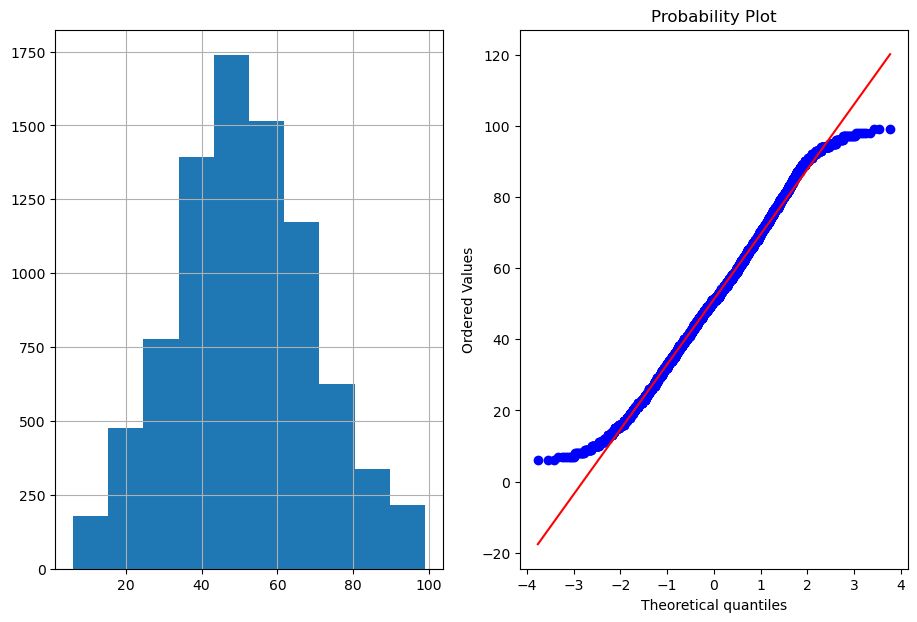

Pressure9am


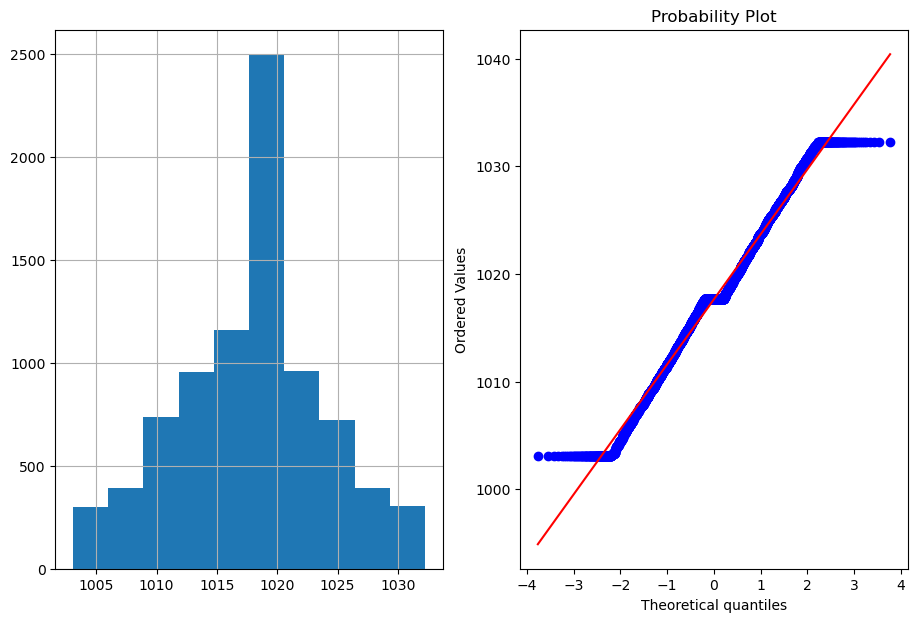

Pressure3pm


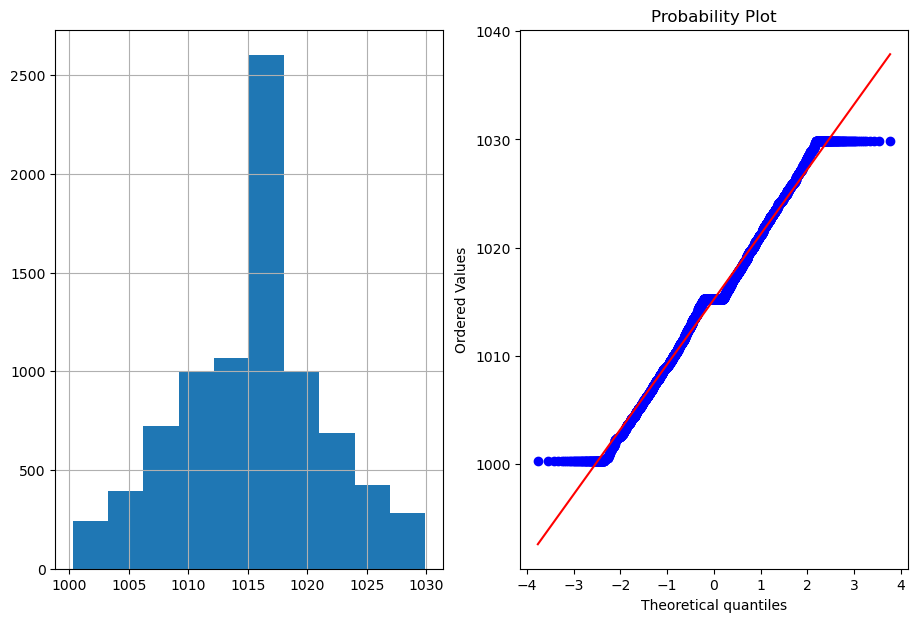

Temp9am


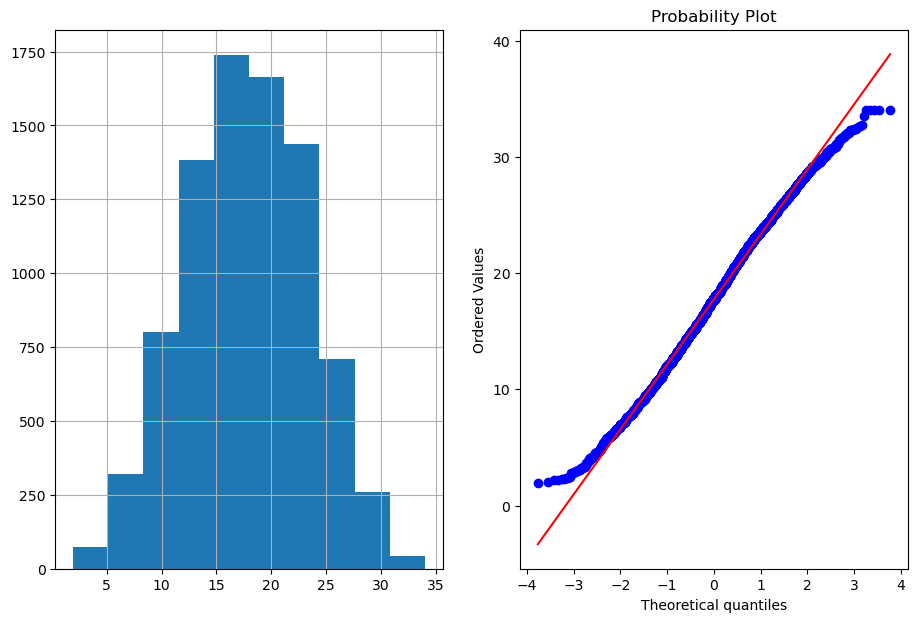

Temp3pm


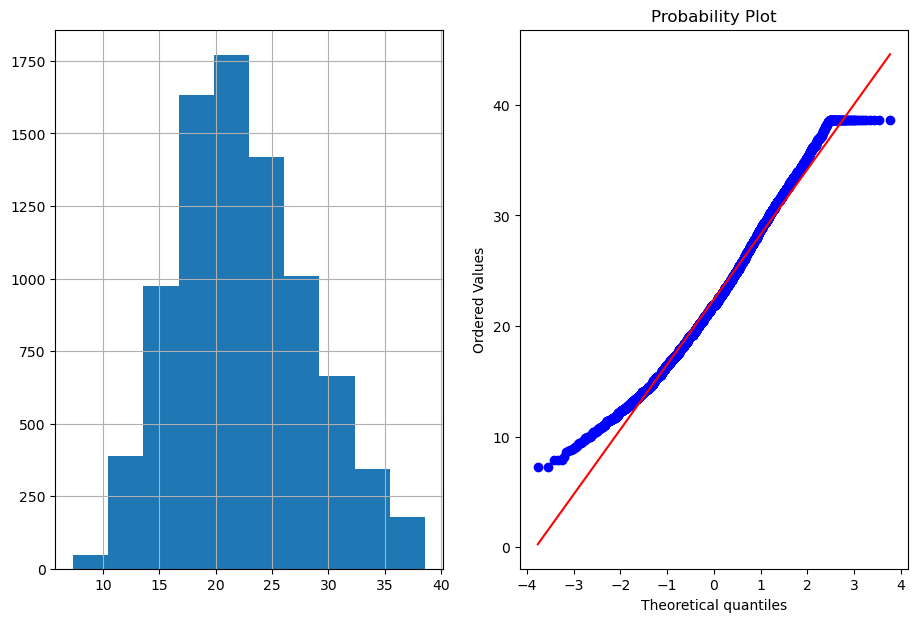

In [51]:
for feature in cont_fet:
    print(feature)
    plt.figure(figsize=(11,7))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=plt)
    plt.show()

In [52]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_Month,Date_Day,Date_year
0,2008-12-01,1,13.4,22.9,0.6,3.0,13.8,13,44.0,13,...,1007.1,8.0,8.0,16.9,21.8,0,0,12,1,2008
1,2008-12-02,1,7.4,25.1,0.0,2.2,7.6,14,44.0,6,...,1007.8,1.0,4.0,17.2,24.3,0,0,12,2,2008
2,2008-12-03,1,12.9,25.7,0.0,4.6,7.7,15,46.0,13,...,1008.7,2.0,2.0,21.0,23.2,0,0,12,3,2008
3,2008-12-04,1,9.2,28.0,0.0,1.8,8.0,4,24.0,9,...,1012.8,8.0,7.0,18.1,26.5,0,0,12,4,2008
4,2008-12-05,1,17.5,32.3,1.0,3.8,11.9,13,41.0,1,...,1006.0,7.0,8.0,17.8,29.7,0,0,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,9,2.8,23.4,0.0,6.4,1.2,0,31.0,9,...,1020.3,8.0,4.0,10.1,22.4,0,0,6,21,2017
8421,2017-06-22,9,3.6,25.3,0.0,12.6,7.1,6,22.0,9,...,1019.1,1.0,1.0,10.9,24.5,0,0,6,22,2017
8422,2017-06-23,9,5.4,26.9,0.0,4.2,13.0,3,37.0,9,...,1016.8,6.0,5.0,12.5,26.1,0,0,6,23,2017
8423,2017-06-24,9,7.8,27.0,0.0,4.0,13.1,9,28.0,10,...,1016.5,3.0,2.0,15.1,26.0,0,0,6,24,2017


In [53]:
x=df.drop(['RainTomorrow','Date'],axis=1)
y=df['RainTomorrow']

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [55]:
x_train.shape

(6740, 24)

In [56]:
y_train.shape

(6740,)

# Model Training

In [57]:
from collections import Counter

In [58]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [59]:
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)
print('The classes before {}'.format(Counter(y_train)))
print('The classes Ater {}'.format(Counter(y_train_res)))

The classes before Counter({0: 5147, 1: 1593})
The classes Ater Counter({0: 5147, 1: 5147})


In [60]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(iterations=2000,eval_metric='AUC')

In [61]:
cat.fit(x_train,y_train)

Learning rate set to 0.012323
0:	total: 140ms	remaining: 4m 39s
1:	total: 149ms	remaining: 2m 29s
2:	total: 157ms	remaining: 1m 44s
3:	total: 164ms	remaining: 1m 21s
4:	total: 169ms	remaining: 1m 7s
5:	total: 173ms	remaining: 57.4s
6:	total: 176ms	remaining: 50s
7:	total: 178ms	remaining: 44.4s
8:	total: 181ms	remaining: 40.1s
9:	total: 184ms	remaining: 36.6s
10:	total: 187ms	remaining: 33.7s
11:	total: 189ms	remaining: 31.4s
12:	total: 192ms	remaining: 29.4s
13:	total: 195ms	remaining: 27.6s
14:	total: 198ms	remaining: 26.2s
15:	total: 201ms	remaining: 24.9s
16:	total: 205ms	remaining: 23.9s
17:	total: 209ms	remaining: 23s
18:	total: 214ms	remaining: 22.3s
19:	total: 217ms	remaining: 21.5s
20:	total: 220ms	remaining: 20.7s
21:	total: 223ms	remaining: 20s
22:	total: 227ms	remaining: 19.6s
23:	total: 231ms	remaining: 19s
24:	total: 233ms	remaining: 18.4s
25:	total: 237ms	remaining: 18s
26:	total: 239ms	remaining: 17.5s
27:	total: 242ms	remaining: 17.1s
28:	total: 245ms	remaining: 16.7s


In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

In [65]:
y_pred1=cat.predict(x_test)
accuracy_score(y_test,y_pred1)

0.8635014836795252

In [66]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1287
           1       0.79      0.57      0.66       398

    accuracy                           0.86      1685
   macro avg       0.84      0.76      0.79      1685
weighted avg       0.86      0.86      0.86      1685



0.762254356475462

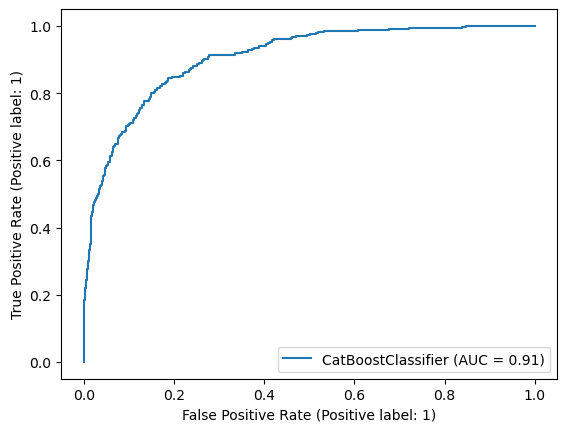

In [67]:
from sklearn import metrics
metrics.plot_roc_curve(cat,x_test,y_test)
metrics.roc_auc_score(y_test,y_pred1,average=None)

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_res,y_train_res)
y_pred2=rf.predict(x_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[1193   94]
 [ 126  272]]
0.8694362017804155
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1287
           1       0.74      0.68      0.71       398

    accuracy                           0.87      1685
   macro avg       0.82      0.81      0.81      1685
weighted avg       0.87      0.87      0.87      1685



0.8051895061945312

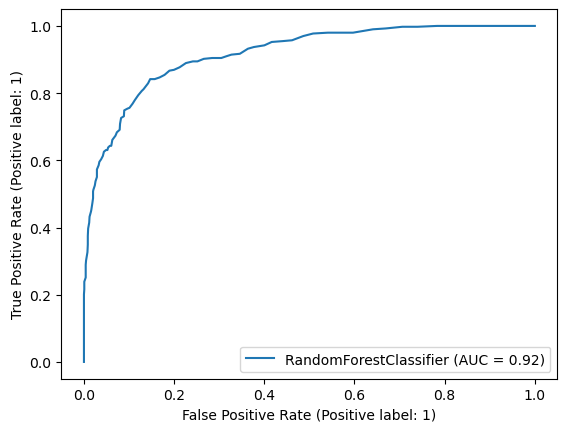

In [69]:
metrics.plot_roc_curve(rf,x_test,y_test)
metrics.roc_auc_score(y_test,y_pred2,average=None)

In [70]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train_res,y_train_res)
y_pred3=gnb.predict(x_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[955 332]
 [117 281]]
0.7335311572700297
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1287
           1       0.46      0.71      0.56       398

    accuracy                           0.73      1685
   macro avg       0.67      0.72      0.68      1685
weighted avg       0.79      0.73      0.75      1685



0.7240329463947554

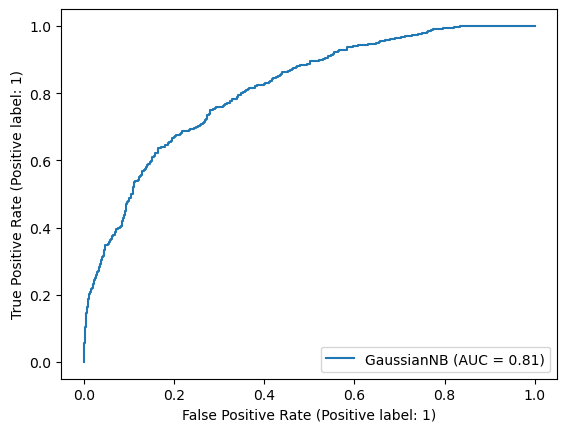

In [71]:
metrics.plot_roc_curve(gnb,x_test,y_test)
metrics.roc_auc_score(y_test,y_pred3,average=None)

In [72]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train_res,y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
y_pred4=xgb.predict(x_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[1211   76]
 [ 134  264]]
0.8753709198813057
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1287
           1       0.78      0.66      0.72       398

    accuracy                           0.88      1685
   macro avg       0.84      0.80      0.82      1685
weighted avg       0.87      0.88      0.87      1685



0.8021322619312569

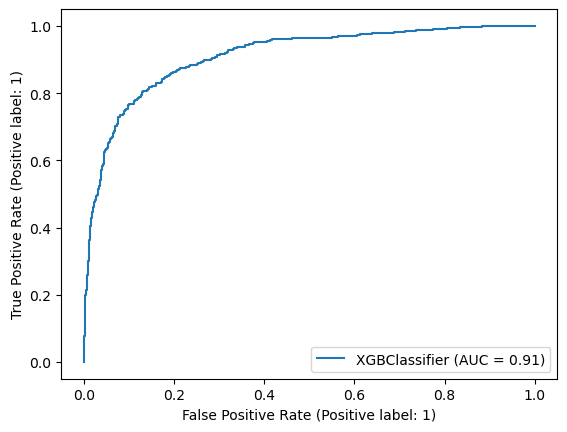

In [74]:
metrics.plot_roc_curve(xgb,x_test,y_test)
metrics.roc_auc_score(y_test,y_pred4,average=None)

In [75]:
import pickle
filename='Final_model_Rain_pred.pkl'
pickle.dump(rf,open(filename,'wb'))

In [76]:

load_model=pickle.load(open(filename,'rb'))
predictions=load_model.score(x_test,y_test)
print(predictions*100)

86.94362017804154


# Conclusion

# * imported the required libraries
* Filled the null values
* checked the distribution between the each columns
* we used label encoding techiniques to conver the categoriacl data into numerical 
* we sacling techinques
* we used the hsitplot and the probability plot on the each columns
* treated the outliers and removed
* splited the data into traning and testing part
* used various models xgboost ,guassiannb,randomforest,logistic regtression 
* build roc_auc_curve for each model 
* and given the classification and confusion matrix for the columns
* we saved the randomforest model as gives us the good accauracy and saved with the help of Pickle method